In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve
from keras.utils.np_utils import to_categorical
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('datasets/2018-06-06-pdb-intersect-pisces.csv')

window =17
aminoacids = 'ACDEFGHIKLMNPQRSTVWY*'
n = len(aminoacids)
matrice = np.identity(n)
aa_dict = {}
i = 0
for aa in aminoacids:
    aa_dict[aa] = matrice[i,]
    i += 1

In [5]:
tempdict = {}
codes = []
d = 30000
a = 0
data = {'H':0, 'E':0, 'C':0}
while (data['H'] + data['E'] + data['C']) < d:
    sequence = df.loc[a,'seq']
    seq_sst3 = df.loc[a,'sst3']
    i = 0
    while i <= (len(sequence)-window):
        j = 0
        if seq_sst3[int((i+i+window)/2)] == 'H':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 0
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['H'] += 1
        elif seq_sst3[int((i+i+window)/2)] == 'E':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 1
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['E'] += 1
        elif seq_sst3[int((i+i+window)/2)] == 'C':
            for character in sequence[i:i+window]:
                for k in range(n):
                    tempdict[f'a{j}a{k}'] = aa_dict[character][k]
                    k +=1
                j += 1
            tempdict['sst3'] = 2
            codes.append(tempdict)
            tempdict = {}
            i += 1
            data['C'] += 1
        else:
            i += 1
    a += 1
df2 = pd.DataFrame(codes)
df2.loc[:30]

,a0a0,a0a1,a0a2,a0a3,a0a4,a0a5,a0a6,a0a7,a0a8,a0a9,...,a16a12,a16a13,a16a14,a16a15,a16a16,a16a17,a16a18,a16a19,a16a20,sst3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
y = df2['sst3']

In [7]:
values = y.value_counts()
values

0    15072
2    10550
1     4438
Name: sst3, dtype: int64

(-1.1012341761306552,
 1.1134129494245533,
 -1.1011733934332528,
 1.1000558758777739)

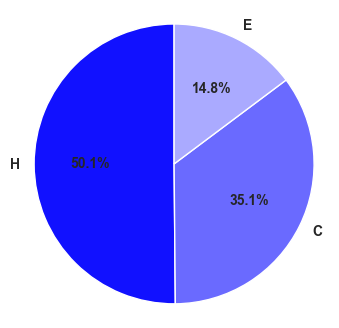

In [8]:
labels = 'H', 'C', 'E'
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['#1111FF', '#6A6AFF', '#AAAAFF'], textprops={'weight':"bold"})
ax1.axis('equal')

In [32]:
from pygooglechart import PieChart3D

def python_pie3D() :
  # initialize chart object, 250 x 250 pixels
  chart = PieChart3D(500, 250)

  # pass your data to the chart object
  chart.add_data(values)

  # make labels for the slices
  chart.set_pie_labels(labels)
  chart.legend
  chart.set_legend_position('r')

  # render the image
  chart.download('pie_chart.png')
python_pie3D()

In [4]:
X = df2.drop(['sst3'], axis=1)
y = df2['sst3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,a0a0,a0a1,a0a2,a0a3,a0a4,a0a5,a0a6,a0a7,a0a8,a0a9,...,a16a11,a16a12,a16a13,a16a14,a16a15,a16a16,a16a17,a16a18,a16a19,a16a20
count,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,...,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04,2.404800e+04
mean,2.541029e-17,-5.141153e-17,6.973057e-17,-7.563995e-17,-3.043326e-17,1.122780e-17,-3.693357e-17,-2.747857e-17,9.454993e-18,1.713718e-17,...,-3.043326e-17,-7.209432e-17,-1.905772e-17,1.181874e-18,7.800369e-17,-4.579762e-17,-1.772811e-17,-2.600123e-17,6.263933e-17,5.909371e-18
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
25%,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
50%,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
75%,-2.875031e-01,-1.634840e-01,-2.479668e-01,-3.000317e-01,-1.773104e-01,-2.651834e-01,-1.461621e-01,-2.373993e-01,-2.696469e-01,-3.154171e-01,...,-2.058949e-01,-2.003457e-01,-2.231818e-01,-2.504139e-01,-2.515373e-01,-2.252276e-01,-2.561773e-01,-1.079484e-01,-1.708441e-01,-3.289895e-02
max,3.478224e+00,6.116808e+00,4.032798e+00,3.332981e+00,5.639826e+00,3.770975e+00,6.841721e+00,4.212312e+00,3.708554e+00,3.170405e+00,...,4.856846e+00,4.991372e+00,4.480653e+00,3.993388e+00,3.975554e+00,4.439953e+00,3.903547e+00,9.263686e+00,5.853289e+00,3.039610e+01


In [9]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(0,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

C:\Users\lenan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\lenan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [11]:
knn_cv.best_params_

{'n_neighbors': 17}

              precision    recall  f1-score   support

           0       0.54      0.97      0.70      3034
           1       0.64      0.03      0.05       888
           2       0.67      0.18      0.28      2090

    accuracy                           0.56      6012
   macro avg       0.62      0.39      0.34      6012
weighted avg       0.60      0.56      0.46      6012



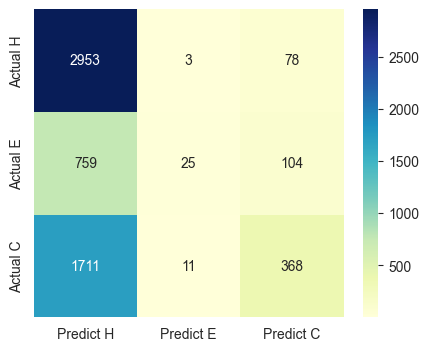

In [5]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict H', 'Predict E', 'Predict C'],
                                 index=['Actual H', 'Actual E', 'Actual C'])
plt.figure(figsize = (5,4))
ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test,y_pred))

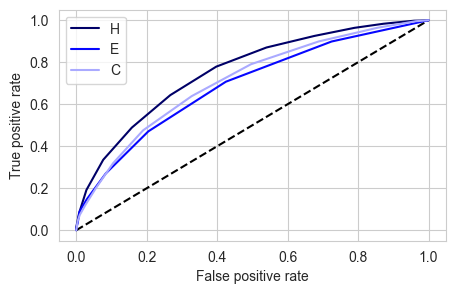

In [13]:
y_pred_proba = knn.predict_proba(X_test)
y_test2 = to_categorical(y_test, num_classes = 3)
fpr0, tpr0, thresholds0 = roc_curve(y_test2[:,0], y_pred_proba[:,0])
fpr1, tpr1, thresholds1 = roc_curve(y_test2[:,1], y_pred_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test2[:,2], y_pred_proba[:,2])
plt.figure(figsize = (5,3))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr0,tpr0, label='H', c='#000067')
plt.plot(fpr1,tpr1, label='E', c='#0707FF')
plt.plot(fpr2,tpr2, label='C', c='#AAAAFF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

In [6]:
y_pred_test=knn.predict(X_test)
print('Model accuracy score with KNN classifier : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
# check for overfitting and underfitting
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
# compare model accuracy with null accuracy
null_accuracy = (max(y_test.value_counts())/(sum(y_test.value_counts())))
print('Null accuracy score: {0:0.4f}\n'. format(null_accuracy))

Model accuracy score with KNN classifier : 0.5566
Training set score: 0.5866
Null accuracy score: 0.5047

MAE: 0.7410
MSE: 1.3362


In [21]:
# instantiate knn clasifier with 6-fold cross-validation
kfold=KFold(n_splits=6, shuffle=True, random_state=0)
rbf_scores = cross_validate(knn, X, y, cv=kfold, scoring=['accuracy', 'neg_mean_absolute_error','neg_mean_squared_error'])
print('Stratified 6-fold cross-validation scores with knn classifier:\n\n{}'.format(rbf_scores['test_accuracy']))
print('Average stratified 6-fold cross-validation score with knn classifier:{:.4f}'.format(rbf_scores['test_accuracy'].mean()))
print('Average stratified 6-fold cross-validation MAE with knn classifier:{:.4f}'.format(-rbf_scores['test_neg_mean_absolute_error'].mean()))
print('Average stratified 6-fold cross-validation MsE with knn classifier:{:.4f}'.format(-rbf_scores['test_neg_mean_squared_error'].mean()))

Stratified 6-fold cross-validation scores with knn classifier:

[0.61057884 0.61097804 0.59840319 0.60339321 0.60239521 0.5994012 ]
Average stratified 6-fold cross-validation score with knn classifier:0.6042
Average stratified 6-fold cross-validation MAE with knn classifier:0.6477
Average stratified 6-fold cross-validation MsE with knn classifier:1.1516
